<a href="https://colab.research.google.com/github/ronan777/HydroProc/blob/main/AcquireDisplay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy import read_inventory
from obspy import read
import obspy.core.stream as st
import obspy.signal.cross_correlation as cc
import obspy.signal.filter as flt
import obspy.signal.trigger as trg
import obspy.signal.freqattributes as frq
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math
import gc


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - obspy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.1.0               |       hd590300_1          19 KB  conda-forge
    brotli-bin-1.1.0           |       hd590300_1          19 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda

16800.0
(-1.9386950000000207, 0.49834692578129824) (-1.3987489999999372, -1.4550044492706635)
(-0.31888584116312174, -1.1124813333333192, -0.011333333333333334) (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008) (-1.4550044492706635, -1.3987489999999372, -0.026)


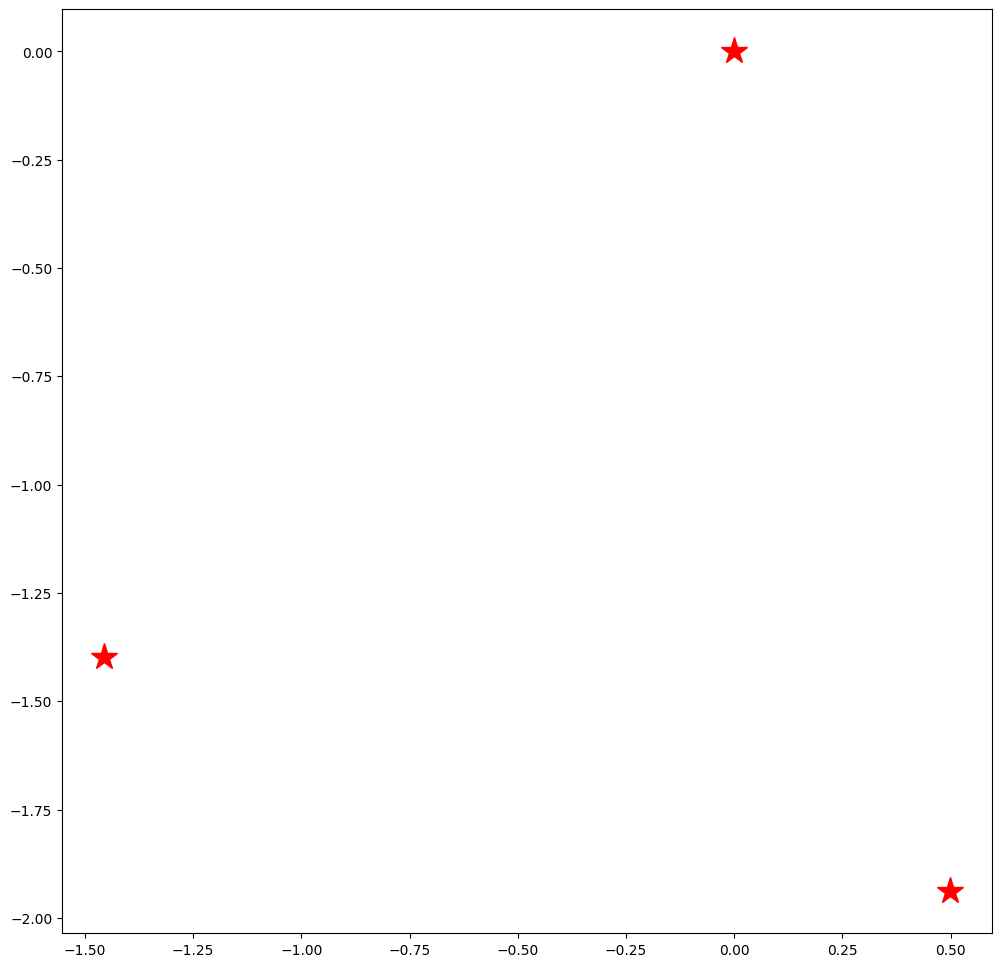

In [ ]:
##
# Parameter initialization
#
#timestring="2024-02-21 01:00:00"
#timestring="2024-02-20 23:00:00"
#timestring="2024-02-20 21:00:00"
#timestring="2024-02-20 19:00:00"
#timestring="2024-02-20 17:00:00"
#timestring="2024-02-20 15:00:00"
#timestring="2024-02-20 14:00:00"
#timestring="2024-02-20 12:00:00"
#timestring="2024-02-20 10:00:00"
#timestring="2024-02-20 09:30:00"
#timestring="2024-02-20 09:00:00"
#timestring="2024-02-20 07:00:00"
#timestring="2024-02-20 07:30:00"
#timestring="2024-02-20 05:30:00"
#timestring="2024-02-20 05:10:00"
#timestring="2024-02-20 03:00:00"
#timestring="2024-02-20 03:45:00"
#timestring="2024-02-20 01:00:00"
#timestring="2024-02-20 00:12:00"
#timestring="2024-02-20 02:00:00"
#timestring="2024-02-20 02:20:00"
#timestring="2024-02-20 02:22:00"
#timestring="2024-02-20 02:30:00"
#timestring="2024-02-19 23:00:00"
#timestring="2024-02-19 21:00:00"
timestring="2024-02-19 22:40:00"
#timestring="2024-02-19 19:00:00"
#timestring="2024-02-19 18:20:00"
timestring0="2024-02-19 18:00:00"
starttime=UTCDateTime(timestring)
starttime0=UTCDateTime(timestring0)
firsttime=starttime-starttime0
print(firsttime)
#Interval = 36000
#Interval = 300
#Interval = 3600
#Interval = 7200
Interval = 1800
#Interval = 9600
#Interval = 1200
#Interval = 960
#Interval = 10
path="/content/drive/MyDrive/MSEED/"
hvel = 1.48
depth = -0.750
coord_correction = False
#
#
#
# Map of the triplet
#
#
#
h11s1=(18.50827,166.700272)
h11s2=(18.49082,166.705002)
h11s3=(18.49568,166.686462)
kmdeg=111.1
x2=(kmdeg*(h11s2[0]-h11s1[0]),kmdeg*(h11s2[1]-h11s1[1])*math.cos(np.pi*18.5/180))
x3=(kmdeg*(h11s3[0]-h11s1[0]),kmdeg*(h11s3[1]-h11s1[1])*math.cos(np.pi*18.5/180))
print(x2,x3)
S1_i = (0., 0., 0.)
S2_i = (x2[1], x2[0], -0.008)
S3_i = (x3[1], x3[0], -0.026)
S1 = S1_i
S2 = S2_i
S3 = S3_i
S0 = ((S1[0]+S2[0]+S3[0])/3, (S1[1]+S2[1]+S3[1])/3, (S1[2]+S2[2]+S3[2])/3)
print(S0, S1,S2,S3)
#Delta_S = np.load(path+"Delta_S"+"_"+timestring+"_"+str(Interval)+".npy")

fig, ax = plt.subplots(figsize=(12, 12), )
plt.plot([0],[0],'r*', markersize=20)
plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
plt.plot([x3[1]],[x3[0]],'r*', markersize=20)
plt.plot([0],[0],'r-')
if (coord_correction):
  Delta_S = np.load(path+"Delta_S"+"_"+timestring+"_"+str(Interval)+".npy")
# plt.plot([Delta_S[1]]+Delta_S[0],[Delta_S[2]]+Delta_S[3],'r.', markersize=20)
  plt.plot([x3[1]]+Delta_S[6],[x3[0]]+Delta_S[7],'r.', markersize=20)
  plt.plot([x2[1]]+Delta_S[3],[x2[0]]+Delta_S[4],'r.', markersize=20)
  plt.plot(Delta_S[0],Delta_S[1],'r.', markersize=20)
  plt.plot([x3[1]]+Delta_S[6],[x3[0]]+Delta_S[7]+Delta_S[8],'ko', markersize=5)
  plt.plot([x2[1]]+Delta_S[3],[x2[0]]+Delta_S[4]+Delta_S[5],'ko', markersize=5)
  plt.plot(Delta_S[0],Delta_S[1]+Delta_S[2],'ko', markersize=5)
  ax = plt.figure(figsize=(24, 12)).add_subplot(projection='3d')
  t1x=(S1[0],S2[0],S3[0], S1[0])
  t1y=(S1[1],S2[1],S3[1], S1[1])
  t1z=(S1[2],S2[2],S3[2], S1[2])
  ax.plot(t1x,t1y,t1z,'r-')
  t2x=(S1[0]+Delta_S[0],S2[0]+Delta_S[3],S3[0]+Delta_S[6], S1[0]+Delta_S[0])
  t2y=(S1[1]+Delta_S[1],S2[1]+Delta_S[4],S3[1]+Delta_S[7], S1[1]+Delta_S[1])
  t2z=(S1[2]+Delta_S[2],S2[2]+Delta_S[5],S3[2]+Delta_S[8], S1[2]+Delta_S[2])
  ax.plot(t2x,t2y,t2z,'k-')
  l1x = (S1[0],S1[0]+Delta_S[0])
  l1y = (S1[1],S1[1]+Delta_S[1])
  l1z = (0.,0.)
  ax.plot(l1x,l1y,l1z,'r--')
  l1x = (S2[0],S2[0]+Delta_S[3])
  l1y = (S2[1],S2[1]+Delta_S[4])
  l1z = (0.,0.)
  ax.plot(l1x,l1y,l1z,'r--')
  l1x = (S3[0],S3[0]+Delta_S[6])
  l1y = (S3[1],S3[1]+Delta_S[7])
  l1z = (0.,0.)
  ax.plot(l1x,l1y,l1z,'r--')
  l1x = (S1[0]+Delta_S[0],S1[0]+Delta_S[0])
  l1y = (S1[1]+Delta_S[1],S1[1]+Delta_S[1])
  l1z = (0.,Delta_S[2])
  ax.plot(l1x,l1y,l1z,'k--')
  l1x = (S2[0]+Delta_S[3],S2[0]+Delta_S[3])
  l1y = (S2[1]+Delta_S[4],S2[1]+Delta_S[4])
  l1z = (0.,Delta_S[5])
  ax.plot(l1x,l1y,l1z,'k--')
  l1x = (S3[0]+Delta_S[6],S3[0]+Delta_S[6])
  l1y = (S3[1]+Delta_S[7],S3[1]+Delta_S[7])
  l1z = (0.,Delta_S[8])
  ax.plot(l1x,l1y,l1z,'k--')
  siz = ([200])
  ax.scatter(S1[0], S1[1], S1[2], c='r', marker='*', s=siz)
  ax.scatter(S2[0], S2[1], S2[2], c='r', marker='*', s=siz)
  ax.scatter(S3[0], S3[1], S3[2], c='r', marker='*', s=siz)
  ax.scatter(Delta_S[0], Delta_S[1], 0.,c='r',marker='.', s=siz)
  ax.scatter(S2[0]+Delta_S[3], S2[1]+Delta_S[4], 0.,c='r',marker='.', s=siz)
  ax.scatter(S3[0]+Delta_S[6], S3[1]+Delta_S[7], 0.,c='r',marker='.', s=siz)
  ax.scatter(Delta_S[0], Delta_S[1],Delta_S[2],c='k',marker='.', s=siz)
  ax.scatter(S2[0]+Delta_S[3], S2[1]+Delta_S[4],Delta_S[5],c='k',marker='.', s=siz)
  ax.scatter(S3[0]+Delta_S[6], S3[1]+Delta_S[7],Delta_S[8],c='k',marker='.', s=siz)
  elev = 40.
  azim = 120.
  roll = 180
  ax.view_init(elev, azim, roll)
#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)
  ax.set_xlabel("Longitude", size = 16)
  ax.set_ylabel("Latitude", size = 16)
  ax.set_zlabel("Depth", size = 16)
  ticks = np.arange(0.,2,0.5)
#ax.set_xticks(ticks)
#ax.set_yticks(size = 20)
  ax.set_zticks(ticks)
  ax.set_zlim(0, 2.)
#plt.ylabel('Latitude', size=20)
#plt.xlabel('Longitude', size=20)
#plt.zlabel('Depth', size=20)
#plt.annotate('H11S1',xy=(0,0),xytext=(0,0.1),fontsize=20)
#plt.annotate('H11S2',xy=(x2[1],x2[0]),xytext=(x2[1],x2[0]+0.1),fontsize=20)
#plt.annotate('H11S3',xy=(x3[1],x3[0]),xytext=(x3[1],x3[0]+0.1),fontsize=20)
  plt.xlim([-2,1.])
  plt.ylim([-2.5,0.5])
#plt.zlim([0.,0.5])
  plt.show()
  S1 = ([Delta_S[1]]+Delta_S[0],[Delta_S[2]]+Delta_S[3])
  S2 = ([x3[1]]+Delta_S[6],[x3[0]]+Delta_S[7])
  S3 = ([x2[1]]+Delta_S[3],[x2[0]]+Delta_S[4])

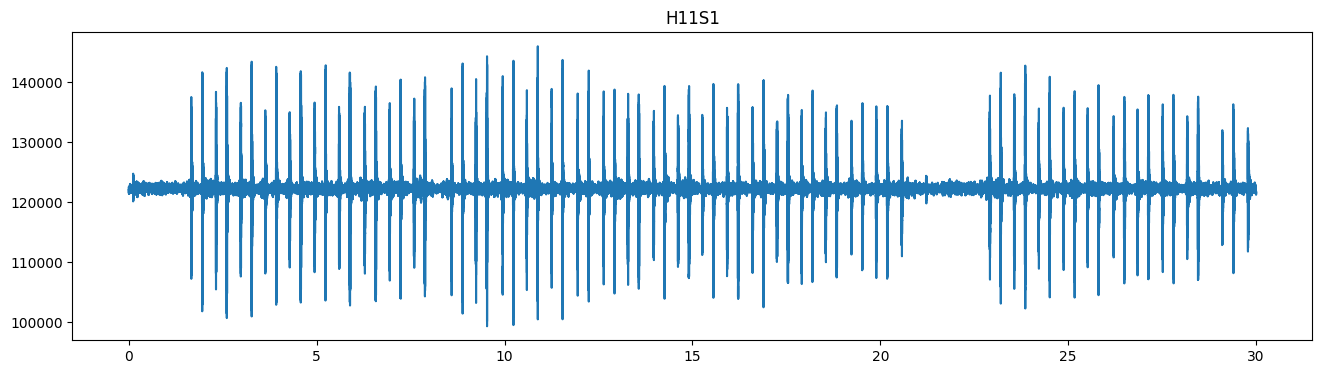

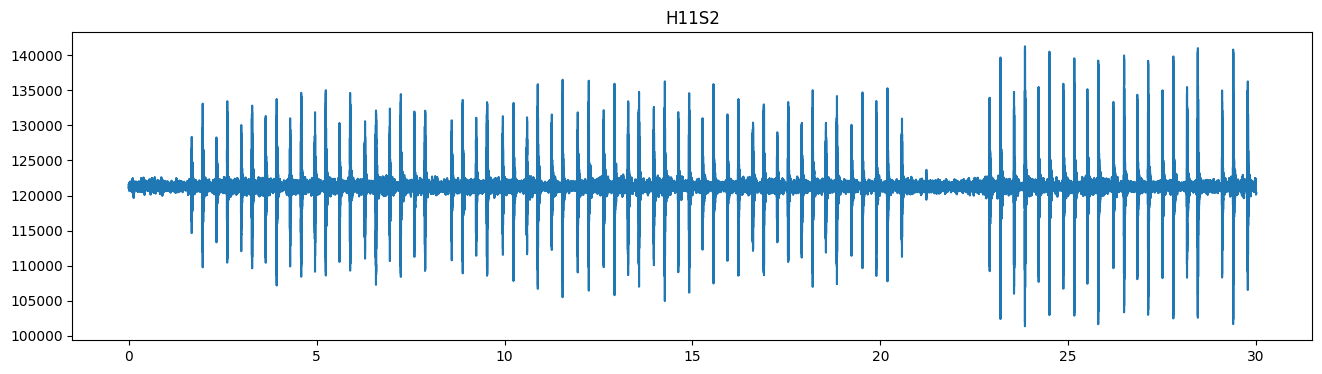

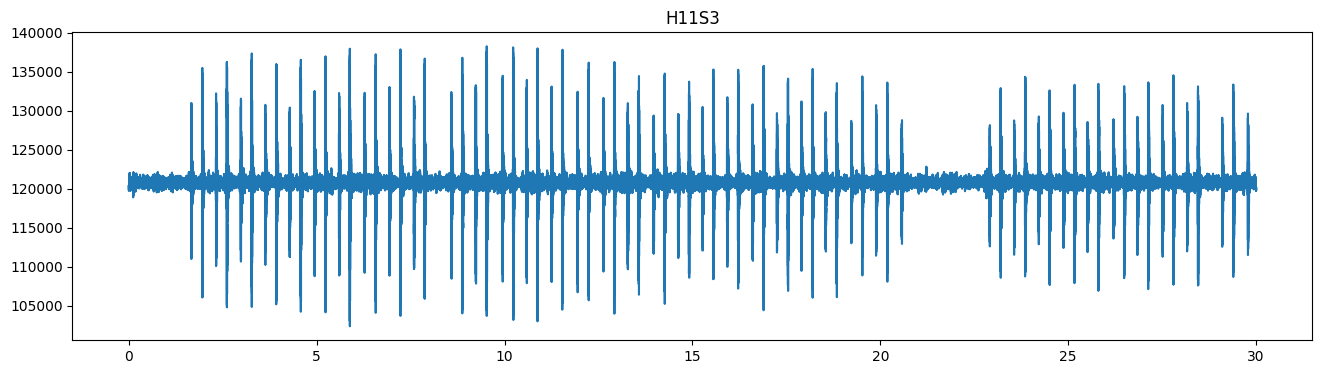

In [ ]:
#
# Read all three waveforms, save to disk, and plot waveforms
#
#
#
#
# Get epoch time from UTCDateTime
# Get two hours of data
#
dT = 10
ndT = dT*250+1
#
mseedfileS2="H11S2_"+timestring+"_"+str(Interval)+".mseed"
mseedfileS3="H11S3_"+timestring+"_"+str(Interval)+".mseed"
mseedfileS1="H11S1_"+timestring+"_"+str(Interval)+".mseed"
plotdelay="delays_"+timestring+"_"+str(Interval)+".png"
plotdistance="dist_"+timestring+"_"+str(Interval)+".png"
plotdistance_cor="cor_dist_"+timestring+"_"+str(Interval)+".png"
n10=0
#
#
client = Client("IRIS")
w2 = client.get_waveforms("IM","H11S2","*","EDH",starttime,starttime+Interval,attach_response=False)
w2.write(path+mseedfileS2,format="MSEED")
w3 = client.get_waveforms("IM","H11S3","*","EDH",starttime,starttime+Interval,attach_response=False)
w3.write(path+mseedfileS3,format="MSEED")
w1 = client.get_waveforms("IM","H11S1","*","EDH",starttime,starttime+Interval,attach_response=False)
w1.write(path+mseedfileS1,format="MSEED")
ndT = Interval*250
tseg=np.empty(ndT)
nt=0
while nt < ndT :
  tseg[nt] = nt/250./60.
  nt+=1
endt = len(w1[0].data)
if (endt > ndT) :
   endt = ndT
fig, ax = plt.subplots(figsize=(16, 4), )
plt.plot(tseg[0:endt-1], w1[0].data[0:endt-1])
plt.title("H11S1")
plt.show()
fig, ax = plt.subplots(figsize=(16, 4), )
plt.plot(tseg[0:endt-1], w2[0].data[0:endt-1])
#plt.plot(w2[0])
plt.title("H11S2")
plt.show()
fig, ax = plt.subplots(figsize=(16, 4), )
plt.plot(tseg[0:endt-1], w3[0].data[0:endt-1])
#plt.plot(w3[0])
plt.title("H11S3")
plt.show()


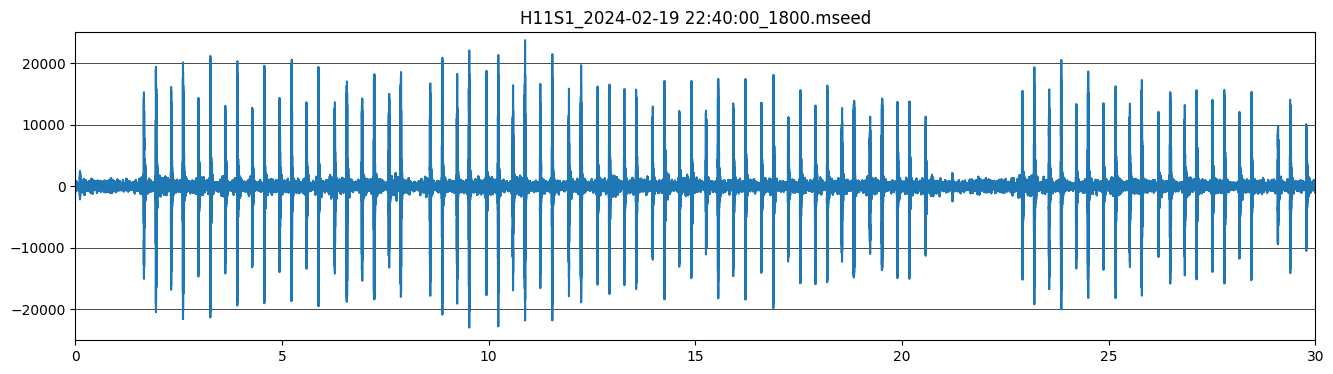

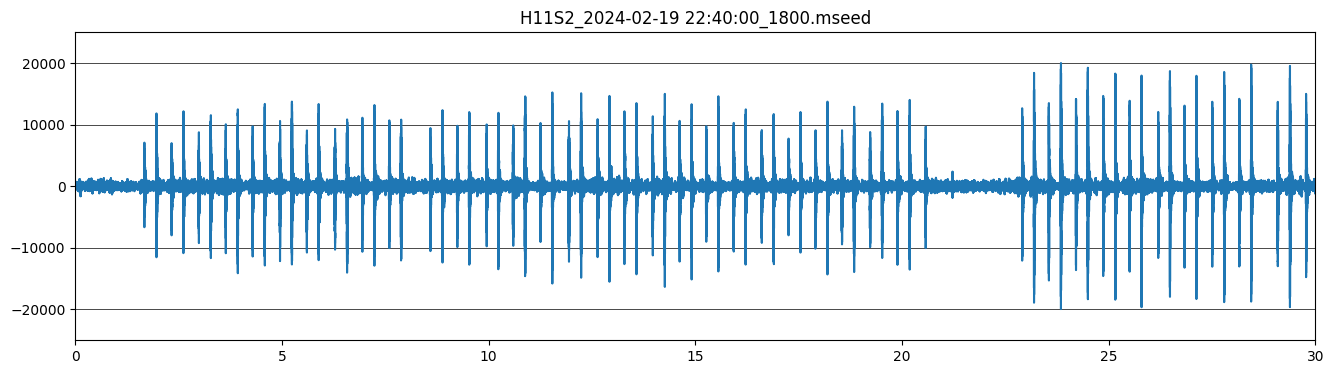

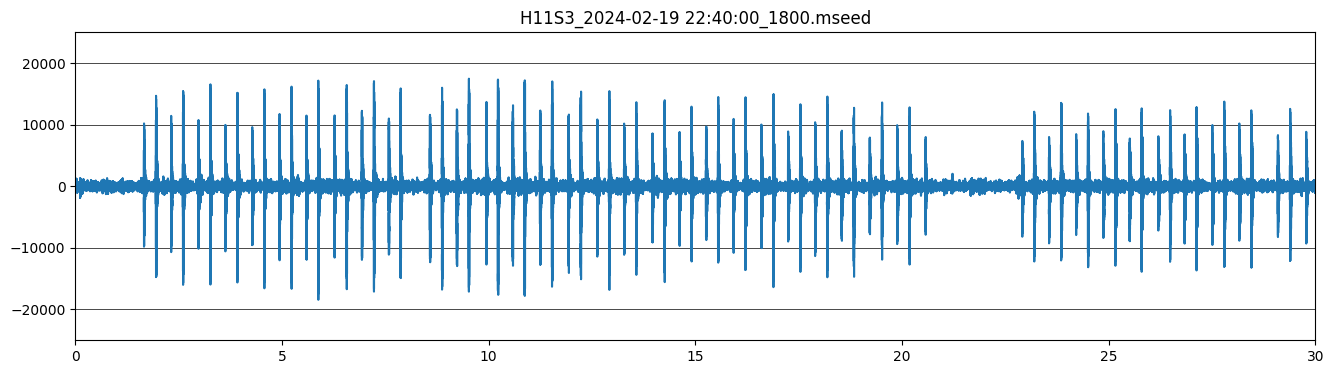

In [ ]:
#
#  Read from disk and plot waveforms - Optional filtering
#
for hyd in ('H11S1', 'H11S2', 'H11S3'):
  mseedfile=hyd+"_"+timestring+"_"+str(Interval)+".mseed"
  st1 = read(path+mseedfile)

  fig, ax = plt.subplots(figsize=(16, 4), )
  ax.hlines([-20000,-10000,0,10000,20000],0,120, color='k', linewidth=0.5)
  ndT = len(st1[0].data)
  tseg=np.empty(ndT)
  nt=0
  dt=250
  while nt < ndT :
    tseg[nt] = nt/250./60.
    nt+=1
  w1 = flt.bandpass(st1.detrend(type='linear')[0].data, 0.1, 125, dt)
  plt.plot(tseg, st1[0].data)
  plt.title(mseedfile)
  plt.xlim(0,30)
  plt.ylim(-25000,25000)
  plt.show()

<class 'matplotlib.image.AxesImage'>
(513, 877)
450000 513 877
-89.25884718454088 72.00063830408709


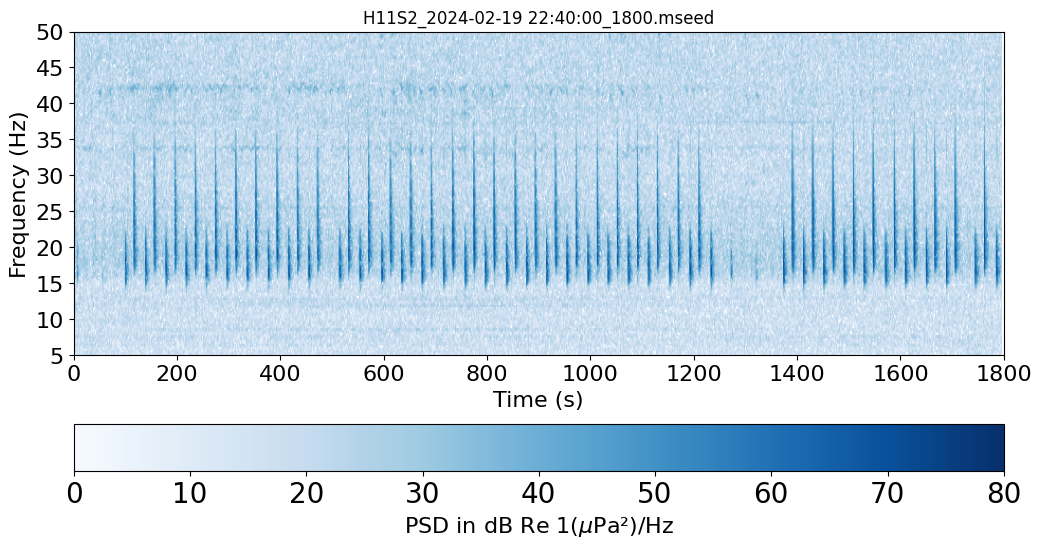

In [ ]:
#
#  Read from disk and plot a spectrogram
#
mseedfileS2="H11S2_"+timestring+"_"+str(Interval)+".mseed"
st1 = read(path+mseedfileS2)
fig, ax = plt.subplots(figsize=(12, 6), )
#cmap = (mpl.colors.ListedColormap(['white', 'grey', 'cyan', 'yellow'])
#        .with_extremes(under='yellow', over='magenta'))
#bounds = [0, 50, 60, 65, 68]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
spec, freq, times, im = plt.specgram(st1[0].data, Fs=250., scale='dB',detrend = 'linear', cmap='Blues', NFFT=1024, noverlap=512)
print (type(im))
print(im.get_size())
print (len(st1[0].data),len(freq), len(times))
plt.ylim([5,50])
#plt.xlim([5000,6100])
plt.title(mseedfileS2)
print(10*math.log10(spec.min()),10*math.log10(spec.max()))
#
#
#
#plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='ocean'),label="dB Re 1Pa/Hz", orientation="horizontal", spacing='proportional')
cbar=plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=20)
cbar.set_label("PSD in dB Re 1($\u03BC$Pa\u00b2)/Hz", fontsize=16)
plt.clim(0,80)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Frequency (Hz)', fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([0,1800])
plt.show()